In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dataset = 'dataset.csv'

df = pd.read_csv(dataset)

df.head()

horas_estudo_mes  salario
0              57.0   6813.0
1              48.0   6855.0
2              60.0   5801.0
3              73.0   7431.0
4              46.0   5475.0

<Axes: xlabel='horas_estudo_mes', ylabel='salario'>

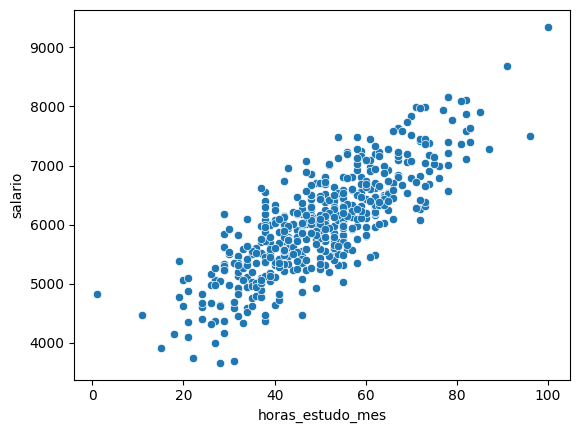

In [2]:
sns.scatterplot(data = df, x = 'horas_estudo_mes', y = 'salario')

<Axes: xlabel='horas_estudo_mes', ylabel='salario'>

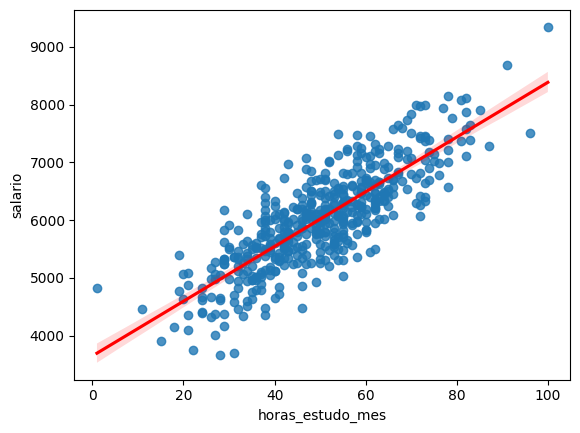

In [3]:
sns.regplot(data = df, x = 'horas_estudo_mes', y = 'salario', line_kws=dict(color='r'))

In [4]:
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

Text(0, 0.5, 'pessoas')

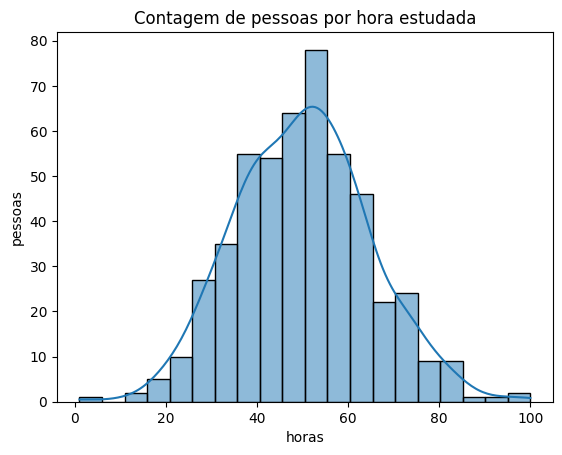

In [5]:

sns.histplot(data = df, x = 'horas_estudo_mes', kde = True)

plt.title("Contagem de pessoas por hora estudada")
plt.xlabel("horas")
plt.ylabel("pessoas") 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
df.describe()

horas_estudo_mes      salario
count        500.000000   500.000000
mean          50.060000  6018.930000
std           14.659406   848.697853
min            1.000000  3664.000000
25%           39.750000  5473.000000
50%           50.000000  6013.500000
75%           60.000000  6542.000000
max          100.000000  9348.000000

In [8]:
df.corr()

horas_estudo_mes   salario
horas_estudo_mes          1.000000  0.818576
salario                   0.818576  1.000000

In [9]:
#variável de entrada = X
X = np.array(df.horas_estudo_mes)

type(X)

numpy.ndarray

In [10]:
X = X.reshape(-1, 1)

In [11]:
y = df.salario

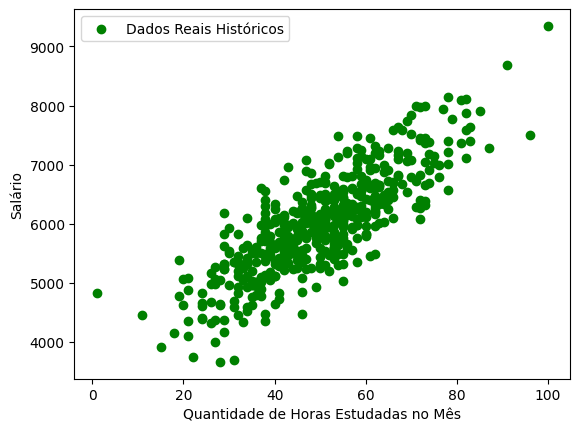

In [14]:
#grafico de dispersao

plt.scatter(X, y, color = 'g', label = 'Dados Reais Históricos')
plt.xlabel('Quantidade de Horas Estudadas no Mês')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [23]:
#Dividir o modelo entre treino e teste:
# X é matriz
# y está em formato vetor
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_treino.shape

(400, 1)

In [18]:
X_teste.shape

(100, 1)

In [22]:
y_treino.shape

(400,)

In [20]:
y_teste.shape

(100,)

In [26]:
#MODELO USADO = Regressão Linear Simples

modelo = LinearRegression()

#TREINANDO MODELO

modelo.fit(X_treino, y_treino)

LinearRegression()

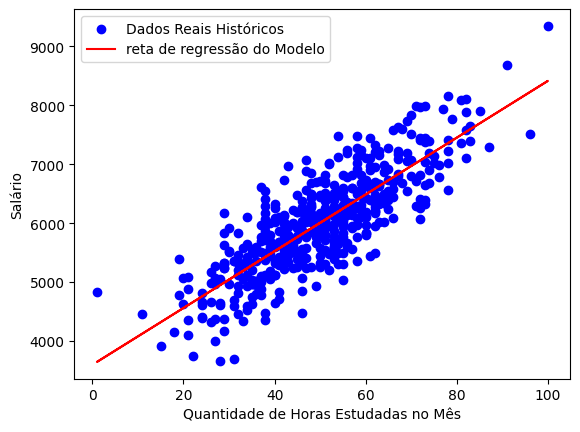

In [32]:
plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'reta de regressão do Modelo')
plt.xlabel('Quantidade de Horas Estudadas no Mês')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [35]:
# Avaliação do modelo
#R^2: quanto mais proximo de 1 é melhor.

score = modelo.score(X_teste, y_teste)
print('Coeficiente R^2:', round(score, 3))

Coeficiente R^2: 0.594


In [36]:
#intercepto

#w0: onde o x é igual a 0, encontra o valor de y.
modelo.intercept_

3596.783724372753

In [37]:
#coeficiente

#w1: atributo do modelo, onde multiplica o x (variavel de entrada)

modelo.coef_

array([48.18185277])

In [42]:
horas_estudo_novo = np.array([[0]])

salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}')

Se você estudar [[0]] horas por mês, seu salário pode ser igual a [3596.78372437]
